# HW7 – Probability Theory

## Problem 1

The skewness of a distribution, denoted as $ \gamma_1 $: $\gamma_1 = \frac{E[(X - \mu)^3]}{\sigma^3}$, 

where $ E $ represents the expectation, $ \mu $ is the mean of the distribution, and $ \sigma $ is the standard deviation.

For an exponential distribution with rate parameter $ \lambda $, the mean $ \mu $ and standard deviation $ \sigma $ are both $ \frac{1}{\lambda} $. 

PDF:

$f(x; \lambda) = \lambda e^{-\lambda x}, \quad x \geq 0$

The third central moment:

$E[(X - \mu)^3] = \int_{0}^{\infty} (x - \mu)^3 f(x; \lambda) \, dx$

Substituting $ \mu = \frac{1}{\lambda} $ and $ f(x; \lambda) = \lambda e^{-\lambda x} $, integrate to find: $E[(X - \mu)^3] = \frac{2}{\lambda^3}$

$\gamma_1 = \frac{2}{\lambda^3} \left( \frac{\lambda}{1} \right)^3 = 2$

**Answer:** 2. 

## Problem 2

$
\text{Kurtosis} = \frac{E[(X - \mu)^4]}{\sigma^4} - 3
$


- Mean $ \mu = p = \frac{1}{2} $
- Variance $ \sigma^2 = p(1-p) = \frac{1}{4} $, hence $ \sigma = \frac{1}{2} $


$
E[(X - \mu)^4] = \sum_{x=0}^{1} (x - \mu)^4 P(X=x)
$

Substituting $ \mu = \frac{1}{2} $ and $ P(X=x) $ for Bernoulli:

$
E[(X - \mu)^4] = (0 - \frac{1}{2})^4 \cdot \frac{1}{2} + (1 - \frac{1}{2})^4 \cdot \frac{1}{2} = \frac{1}{16}
$


$
\text{Kurtosis} = \frac{1/16}{(1/2)^4} - 3 = 1 - 3 = -2
$

**Answer:** -2.

## Problem 3

### 1. Marginal Distributions

The marginal distributions of a multivariate normal distribution are also normal. The mean and variance of each marginal distribution are given by the corresponding elements of the mean vector and the covariance matrix.

**For $ X1 $:**

- Mean $ \mu_{X1} = 2 $
- Variance $ \sigma^2_{X1} = 5 $ (the first diagonal element of the covariance matrix)
- $ X1 \sim N(2, 5) $

**For $ X2 $:**

- Mean $ \mu_{X2} = 3 $
- Variance $ \sigma^2_{X2} = 5 $ (the second diagonal element of the covariance matrix)
- $ X2 \sim N(3, 5) $

### 2. Conditional PDF $ f_{X2|X1=5} $

- Conditional Mean: $ \mu_{X2|X1} = \mu_{X2} + \frac{\sigma_{X1,X2}}{\sigma^2_{X1}}(x_1 - \mu_{X1}) $
- Conditional Variance: $ \sigma^2_{X2|X1} = \sigma^2_{X2} - \frac{\sigma^2_{X1,X2}}{\sigma^2_{X1}} $

Given $ X1 = 5 $:

- $ \mu_{X2|X1=5} = 3 + \frac{2}{5}(5 - 2) = 3 + \frac{6}{5} = 4.2 $
- $ \sigma^2_{X2|X1=5} = 5 - \frac{2^2}{5} = 5 - \frac{4}{5} = 4.2 $

**Answer:** $ f_{X2|X1=5} $ is $ N(4.2, 4.2) $.

## Problem 4

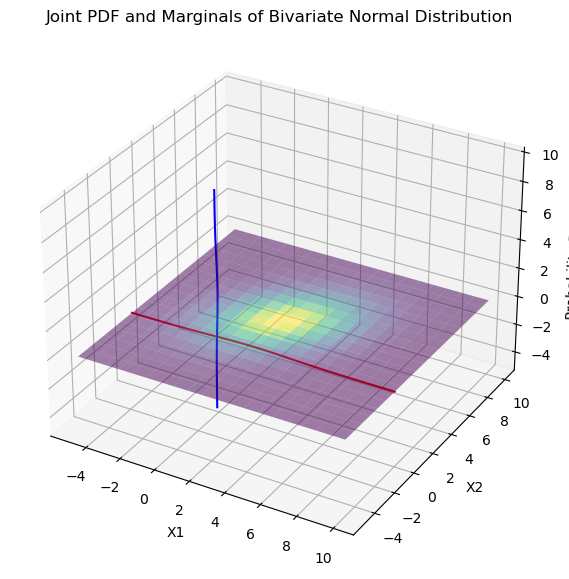

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

mean = np.array([2, 3])
covariance = np.array([[5, 2], [2, 5]])

x = np.linspace(-5, 10, 20)
y = np.linspace(-5, 10, 20)
X, Y = np.meshgrid(x, y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

rv = multivariate_normal(mean, covariance)
Z = rv.pdf(pos)

marginal_x = norm.pdf(x, mean[0], np.sqrt(covariance[0, 0]))
marginal_y = norm.pdf(y, mean[1], np.sqrt(covariance[1, 1]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, alpha=0.5)

ax.plot(x, marginal_x, zs=-0.1, zdir='y', label='pdf X1', color='r')
ax.plot(marginal_y, y, zs=-0.1, zdir='x', label='pdf X2', color='b')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
ax.set_title('Joint PDF and Marginals of Bivariate Normal Distribution')

plt.show()


## Problem 5

### 1. Moment-Generating Function (MGF) of Geom(p)

For a geometric distribution with success probability \( p \), the MGF is given by:

$
M_X(t) = \sum_{k=1}^{\infty} e^{tk} (1-p)^{k-1}p = \frac{pe^t}{1 - (1-p)e^t}, \quad t < -\ln(1-p)
$

### 2. Expectation Using MGF

The expectation is found by differentiating the MGF and evaluating at \( t = 0 \):

$
E[X] = M_X'(0) = \left. \frac{d}{dt} \left( \frac{pe^t}{1 - (1-p)e^t} \right) \right|_{t=0} = \frac{1}{p}
$

### 3. Variance Using MGF

The variance is obtained using the second derivative of the MGF:

$
E[X^2] = M_X''(0) = \left. \frac{d^2}{dt^2} \left( \frac{pe^t}{1 - (1-p)e^t} \right) \right|_{t=0} = \frac{1+p}{p^2}
$

Thus, the variance is:

$
\text{Var}(X) = E[X^2] - (E[X])^2 = \frac{1+p}{p^2} - \left( \frac{1}{p} \right)^2 = \frac{1-p}{p^2}
$